<h1>Import Packages</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import random
import missingno as msno
from scipy import stats
from scipy.stats import shapiro

C:\Users\siyun\AppData\Local\Temp\ipykernel_22152\3511149237.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<h1>Q1</h1>

<h2>Collect Data</h2>

In [2]:
#create final dataframe
joined_df = pd.DataFrame()
#create path to dataset directory
data_path = 'data'

In [3]:
#list all columns available in dataset
column_names = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',	'ZIP CODE',	'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE']

In [4]:
#define function which reads excel files and returns dataframe from that excel file
def collect_data(filename, header_skip):
    df = pd.read_excel(data_path+'/'+filename, header=None, skiprows=header_skip)
    df.columns = column_names

    parts = filename.split("_", 1)
    year = parts[0] #collect the file year
    parts = parts[1].split(".", 1)
    region = parts[0] #collect the file region

    df['REGION'] = region #append the region to the dataframe
    df['YEAR'] = year #append the year to the dataframe
    return df

In [5]:
#header skip sequence is to skip initial rows in each file in data
header_skip_sequence = [0,8,8,8,8,8,8,8,8,8,8,5,5,5,5,5]

In [6]:
#iterate through each file and concatenate all data from excel files to a joined dataframe
#for index, file_name in enumerate(os.listdir(data_path)):
#    if file_name.endswith('.xlsx'):
#        joined_df = pd.concat([joined_df, collect_data(file_name, header_skip_sequence[index])], ignore_index=True)

In [7]:
#export joined dataframe to csv file
#joined_df.to_csv('joined_data.csv', index=False)

<p>Data was collected from excel files and then exported to csv files, all files were concatenated together to one dataframe. In addition the year and region from the file name was appended as a column to the final dataframe.</p>

<hr>

<h2>Initial EDA</h2>

In [8]:
#import from csv file and create dataframe
df = pd.read_csv('joined_data.csv')

In [9]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,REGION,YEAR
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,23,NaN,A1,408 EAST 179TH STREET,NaN,...,1.0,1842.0,2048.0,1901.0,1,A1,0,2021-01-20,bronx,2021
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,1.0,1842.0,2048.0,1901.0,1,A1,600000,2021-01-15,bronx,2021
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,63,NaN,A1,469 EAST 185TH STREET,NaN,...,1.0,1650.0,1296.0,1910.0,1,A1,455000,2021-12-23,bronx,2021
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3045,12,NaN,A1,2052 BATHGATE AVENUE,NaN,...,1.0,2340.0,1516.0,1910.0,1,A1,580000,2021-07-22,bronx,2021
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,39,NaN,A1,2075 BATHGATE AVENUE,NaN,...,1.0,1986.0,1344.0,1899.0,1,A1,0,2021-09-17,bronx,2021


In [10]:
#get borough dataframe subset
def get_borough_df(df, borough):
    return df[df['BOROUGH'] == borough]

In [11]:
#statistics for each borough
for i in range(1,6):
    borough = get_borough_df(df, i)
    print("Borough Number: " + str(i))
    print(borough.describe()) 

Borough Number: 1
       BOROUGH         BLOCK           LOT  EASE-MENT      ZIP CODE  \
count  60814.0  60814.000000  60814.000000        0.0  60814.000000   
mean       1.0   1097.136054    740.520752        NaN  10030.728253   
std        0.0    529.331536    884.504561        NaN     40.058008   
min        1.0      5.000000      1.000000        NaN  10001.000000   
25%        1.0    742.000000     29.000000        NaN  10013.000000   
50%        1.0   1163.000000   1003.000000        NaN  10022.000000   
75%        1.0   1448.000000   1203.000000        NaN  10028.000000   
max        1.0   2250.000000   9114.000000        NaN  10463.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS  LAND SQUARE FEET  \
count       31193.000000       7194.000000  33353.000000       5034.000000   
mean            5.305197          2.243953      5.445627       6625.488876   
std            30.284893         13.765483     30.154705      25933.728960   
min             0.000000      

In [12]:
#dictionary containing each borough dataframe
borough_dict = {
    'borough_1':get_borough_df(df, 1),
    'borough_2':get_borough_df(df, 2),
    'borough_3':get_borough_df(df, 3),
    'borough_4':get_borough_df(df, 4),
    'borough_5':get_borough_df(df, 5)
}

In [13]:
list_of_means_including_missing = list() #list of means including missing values for each borough
list_of_means_excluding_missing = list() #list of means excluding missing values for each borough
list_of_boroughs = [1,2,3,4,5] #list of boroughs

In [14]:
#collect mean sale price for each borough (including missing sale prices)
for borough_num in range(1,6):
    mean_value = borough_dict['borough_'+str(borough_num)]['SALE PRICE'].mean()
    print('Borough Num: ' + str(borough_num) + '\tCount: ' + str(borough_dict['borough_'+str(borough_num)]['SALE PRICE'].count())) # print count of sale prices for each borough
    list_of_means_including_missing.append(mean_value)

Borough Num: 1	Count: 60814
Borough Num: 2	Count: 20598
Borough Num: 3	Count: 76126
Borough Num: 4	Count: 81550
Borough Num: 5	Count: 25262


In [15]:
print(list_of_means_including_missing)

[3061197.2486762917, 834502.6987086125, 1204291.99594094, 948481.9660085837, 540512.6638429262]


In [16]:
#collect mean sale price for each borough (excluding missing sale prices)
for borough_num in range(1,6):
    temp_df=borough_dict['borough_'+str(borough_num)]
    mean_value = temp_df[temp_df['SALE PRICE'] != 0]['SALE PRICE'].mean()
    print('Borough Num: ' + str(borough_num) + '\tCount: ' + str(temp_df[temp_df['SALE PRICE'] != 0]['SALE PRICE'].count()))
    list_of_means_excluding_missing.append(mean_value)

Borough Num: 1	Count: 50629
Borough Num: 2	Count: 14350
Borough Num: 3	Count: 51300
Borough Num: 4	Count: 54927
Borough Num: 5	Count: 17584


In [17]:
print(list_of_means_excluding_missing)

[3677016.126745541, 1197845.755261324, 1787094.200448343, 1408209.1562983596, 776525.8709053685]


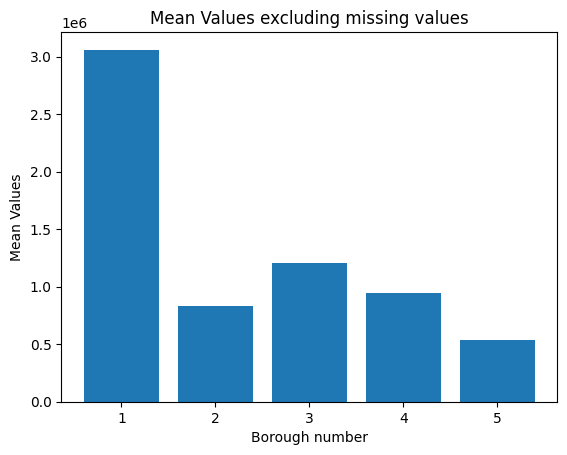

In [18]:
# Create a bar chart for mean values
plt.bar(list_of_boroughs, list_of_means_including_missing)
plt.ylabel('Mean Values')
plt.xlabel('Borough number')
plt.title('Mean Values excluding missing values')
plt.show()

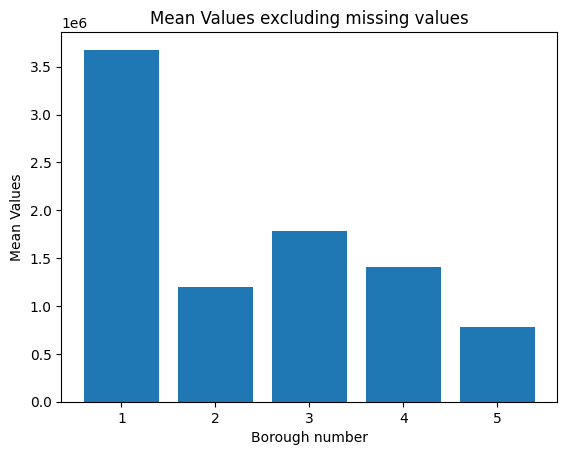

In [19]:
# Create a bar chart for mean values
plt.bar(list_of_boroughs, list_of_means_excluding_missing)
plt.ylabel('Mean Values')
plt.xlabel('Borough number')
plt.title('Mean Values excluding missing values')
plt.show()

<p>As we can see through the bar charts above there is a clear distinction between the average sale prices in each borough. Borough 1 clearly has the highest average sale price being over double the average of the next highest borough in borough number 3. We can see this trend continue even after excluding the missing sale price values with borough number 1 still being the clear winner. We can also see that boroughs 2, 3 and 4 all have around the same average sale price with borough 5 having the clear lowest average. This trend also continues when we remove the missing sale prices.</p>
<p>The counts of each borough were also determined and it is clear that the dataset is not balanced when it comes to the the count of each borough. Borough 4 has the most records with over 81 thousand and borough 2 has the lowest amount of records at around 20 thousand. This means that borough 4 has over 4 times the amount of records as borough 2. This trend also continues when we remove the records with missing sale prices with borough 4 having around 55 thousand and borough 2 having around 14 thousand. In this case borough 4 has just under 4 times the amount of records as borough 2.</p>
<hr>

In [20]:
#types of houses involved in the given dataset, 
print('All Building Class Categories')
print(df['BUILDING CLASS CATEGORY'].unique())

print('\nTotal Number of Building Class Categories')
print(len(df['BUILDING CLASS CATEGORY'].unique()))

print('\nTop 10 Building Class Categories')
print(df['BUILDING CLASS CATEGORY'].value_counts()[:10])

print('\nLowest Building Class Category')
print(str(df['BUILDING CLASS CATEGORY'].value_counts().idxmin()) + ' ' + str(df['BUILDING CLASS CATEGORY'].value_counts().min()))

#total number of houses
print('\nTotal Number of Houses')
print(len(df))

All Building Class Categories
['01 ONE FAMILY DWELLINGS' '02 TWO FAMILY DWELLINGS'
 '03 THREE FAMILY DWELLINGS' '05 TAX CLASS 1 VACANT LAND'
 '08 RENTALS - ELEVATOR APARTMENTS' '10 COOPS - ELEVATOR APARTMENTS'
 '21 OFFICE BUILDINGS' '22 STORE BUILDINGS' '26 OTHER HOTELS'
 '27 FACTORIES' '29 COMMERCIAL GARAGES' '30 WAREHOUSES'
 '31 COMMERCIAL VACANT LAND' '41 TAX CLASS 4 - OTHER'
 '04 TAX CLASS 1 CONDOS' '06 TAX CLASS 1 - OTHER'
 '07 RENTALS - WALKUP APARTMENTS' '14 RENTALS - 4-10 UNIT'
 '39 TRANSPORTATION FACILITIES' '09 COOPS - WALKUP APARTMENTS'
 '12 CONDOS - WALKUP APARTMENTS' '43 CONDO OFFICE BUILDINGS'
 '13 CONDOS - ELEVATOR APARTMENTS' '32 HOSPITAL AND HEALTH FACILITIES'
 '37 RELIGIOUS FACILITIES' '38 ASYLUMS AND HOMES'
 '46 CONDO STORE BUILDINGS' '28 COMMERCIAL CONDOS'
 '36 OUTDOOR RECREATIONAL FACILITIES'
 '35 INDOOR PUBLIC AND CULTURAL FACILITIES'
 '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC' '33 EDUCATIONAL FACILITIES'
 '44 CONDO PARKING' '17 CONDO COOPS' '47 CONDO NON-BUSINES

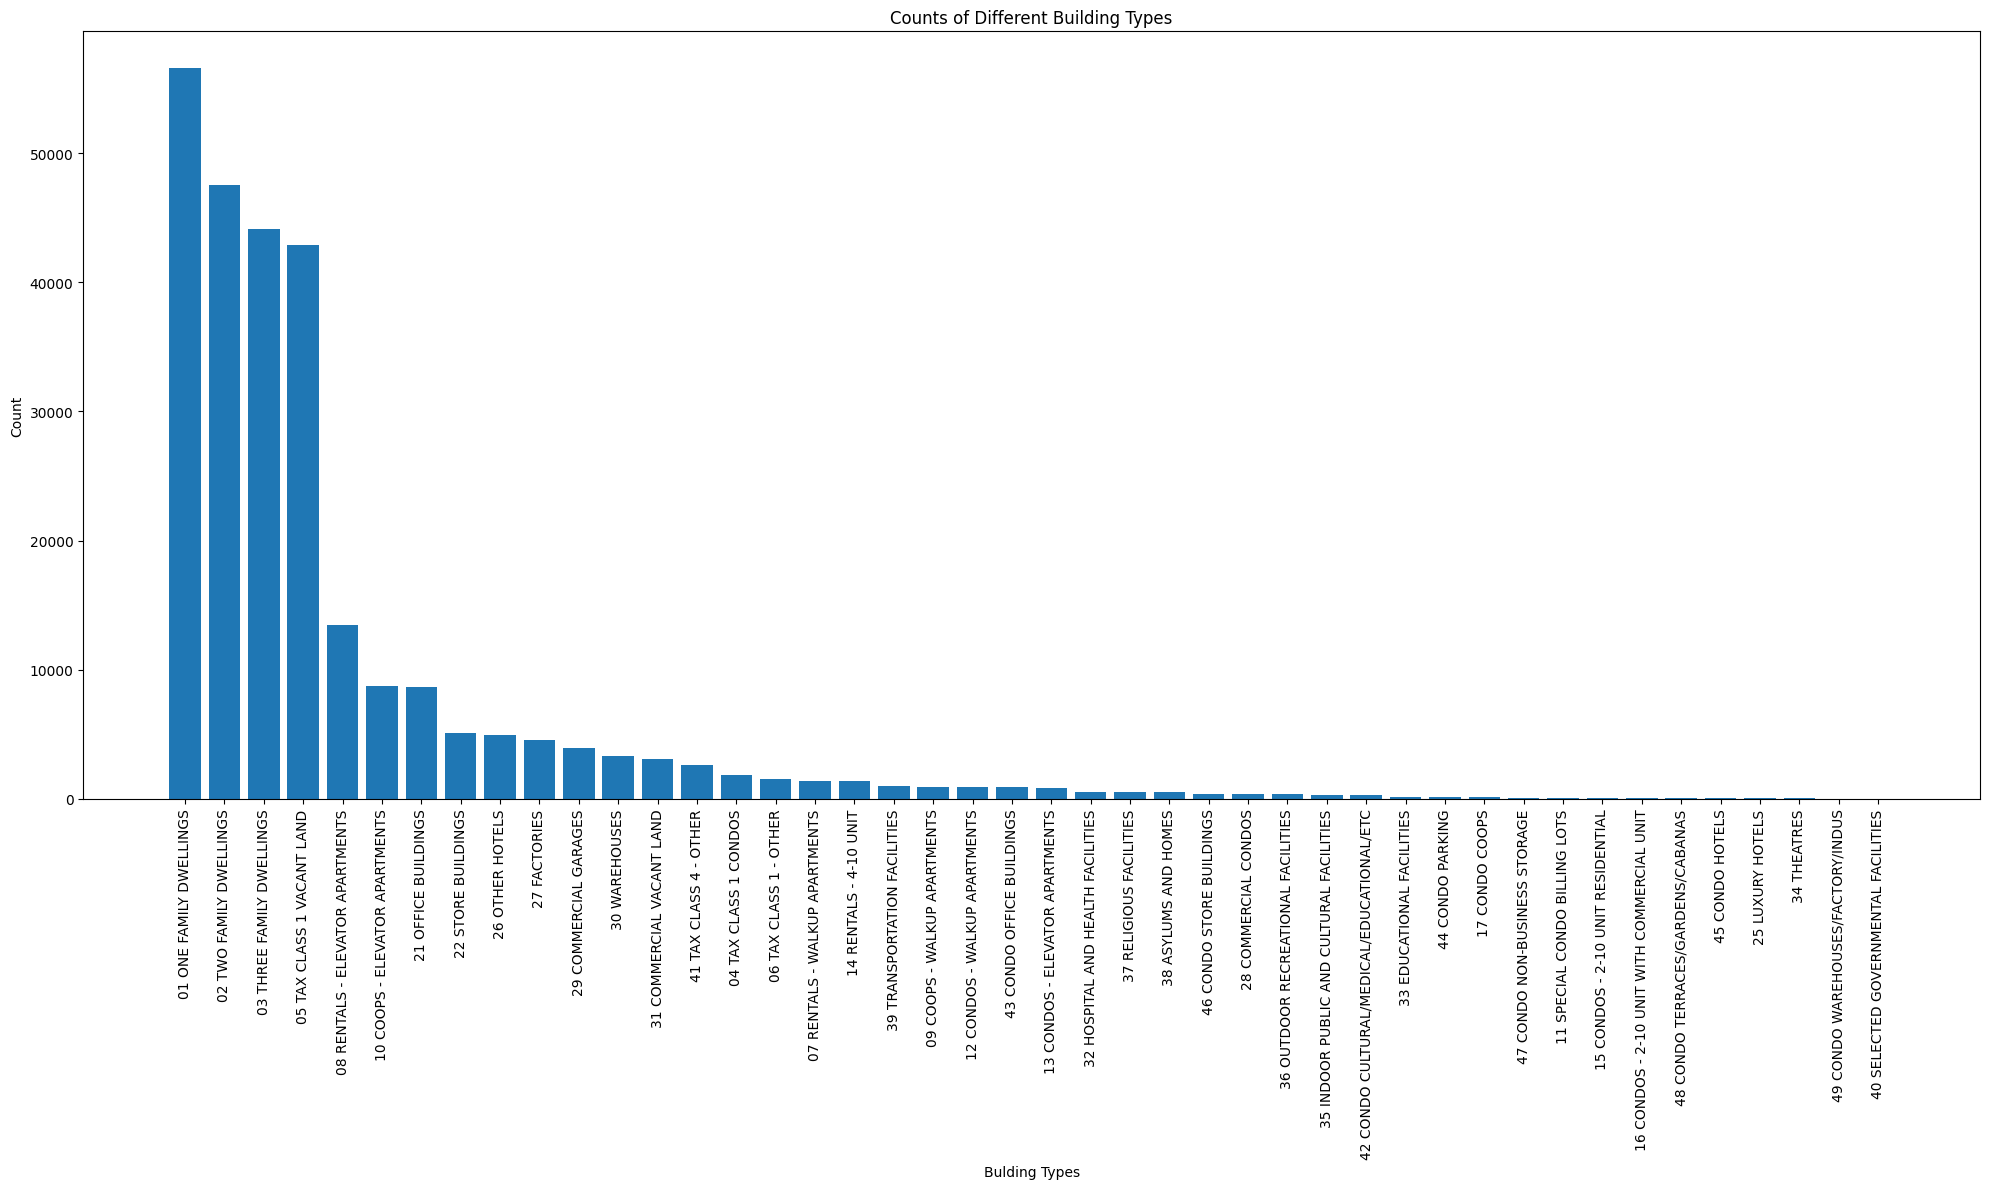

In [21]:
# Create a bar chart for types of houses
plt.figure(figsize=(20, 12))
plt.bar(df['BUILDING CLASS CATEGORY'].unique(), df['BUILDING CLASS CATEGORY'].value_counts())
plt.ylabel('Count')
plt.xlabel('Bulding Types')
plt.xticks(rotation=90)
plt.title('Counts of Different Building Types')
plt.tight_layout() 
plt.show()

In [22]:
# Calculate median sale price for each building class
median_prices = df.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].median().sort_values()

In [23]:
# Get top 10 and worst 10 building classes
top_classes = median_prices.tail().index
worst_classes = median_prices.head().index

In [24]:
#print top and worst building classes
print('Top Building Classes')
print(top_classes)
print('\nWorst Building Classes')
print(worst_classes)

Top Building Classes
Index(['39 TRANSPORTATION FACILITIES', '34 THEATRES', '38 ASYLUMS AND HOMES',
       '26 OTHER HOTELS', '25 LUXURY HOTELS'],
      dtype='object', name='BUILDING CLASS CATEGORY')

Worst Building Classes
Index(['03 THREE FAMILY DWELLINGS', '36 OUTDOOR RECREATIONAL FACILITIES',
       '45 CONDO HOTELS', '05 TAX CLASS 1 VACANT LAND',
       '06 TAX CLASS 1 - OTHER'],
      dtype='object', name='BUILDING CLASS CATEGORY')


In [25]:
def create_boxplots(df, title1, data1, title2, data2):
    fig, axs = plt.subplots(1, 2, figsize=(20, 12))

    sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=df[df['BUILDING CLASS CATEGORY'].isin(data1)], ax=axs[0])
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
    axs[0].set_title(title1)

    sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=df[df['BUILDING CLASS CATEGORY'].isin(data2)], ax=axs[1])
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
    axs[1].set_title(title2)

    plt.tight_layout()
    plt.show()

C:\Users\siyun\AppData\Local\Temp\ipykernel_22152\2013249922.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
C:\Users\siyun\AppData\Local\Temp\ipykernel_22152\2013249922.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)


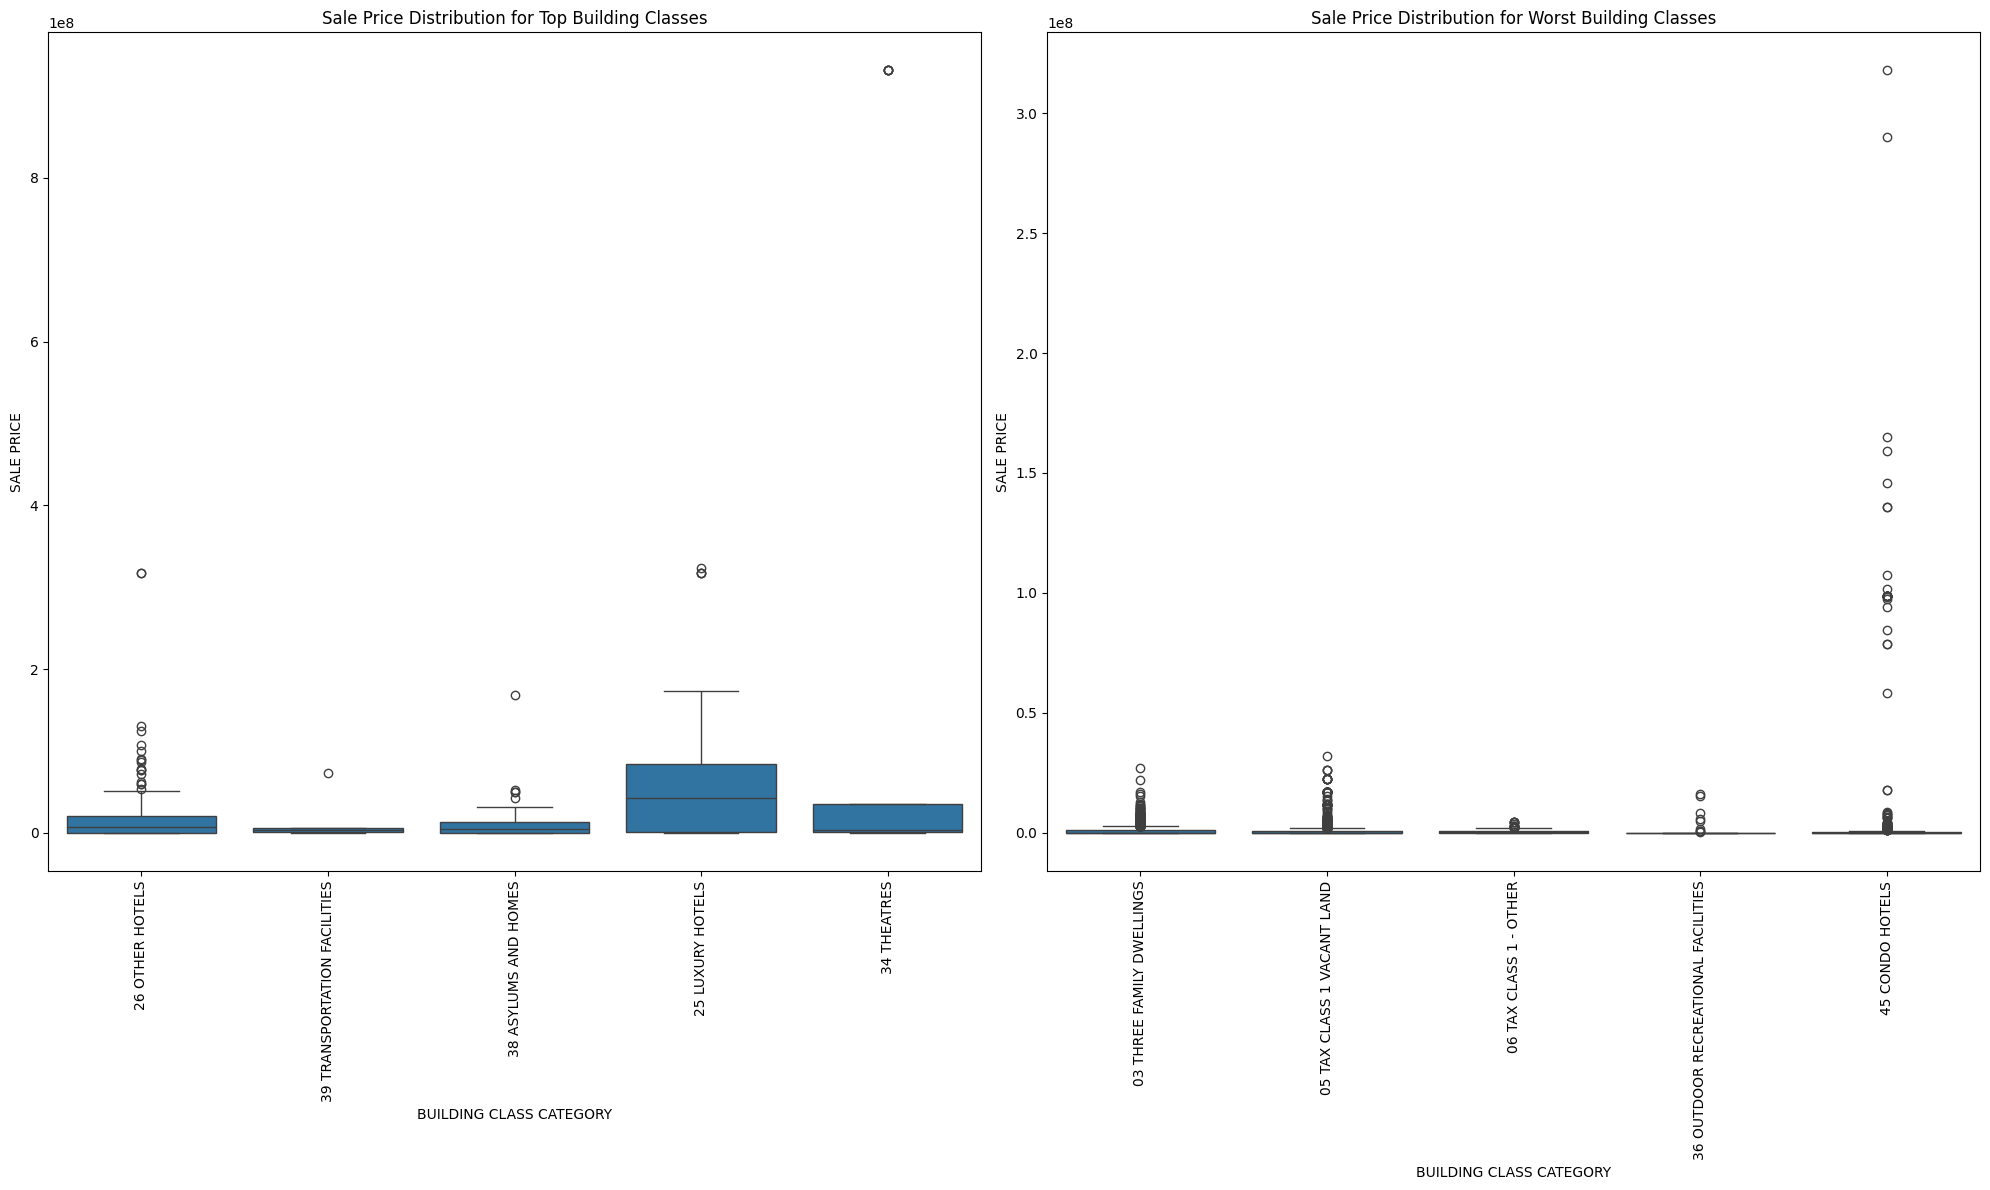

In [26]:
create_boxplots(df, 'Sale Price Distribution for Top Building Classes', top_classes, 'Sale Price Distribution for Worst Building Classes', worst_classes)

<p>As we can see from the findings calculated, there are a total of 44 different building types and a total of 264,350 houses in the dataset. We can see that the top 5 house types sold were: 

<ol>
    <li>01 ONE FAMILY DWELLINGS: 56613
    <li>02 TWO FAMILY DWELLINGS: 47578
    <li>13 CONDOS - ELEVATOR APARTMENTS: 44114
    <li>10 COOPS - ELEVATOR APARTMENTS: 42903
    <li>03 THREE FAMILY DWELLINGS: 13450
</ol>

In addition through the bar graph titled 'Counts of Different Building Types' we can see that after the top 5 building types there is a steep decline in the amount of sales for other building types with the lowest building type being 'SELECTED GOVERNMENTAL FACILITIES' at 4 sales. This outcome can be infered as true due to the nature of the buildings. Since many governmental buildings are most likely actively used for governmental purposes they are not being sold often whereas families often move due to verious factors so family dwellings being sold often can be forseen. 
</p>
<hr>

In [27]:
#missing values in the provided dataset.
print('Missing values in the given dataset')
print(df.isnull().sum())

Missing values in the given dataset
BOROUGH                                0
NEIGHBORHOOD                           0
BUILDING CLASS CATEGORY                0
TAX CLASS AT PRESENT                 347
BLOCK                                  0
LOT                                    0
EASE-MENT                         264350
BUILDING CLASS AT PRESENT            347
ADDRESS                                0
APARTMENT NUMBER                  198893
ZIP CODE                              17
RESIDENTIAL UNITS                  64181
COMMERCIAL UNITS                  113744
TOTAL UNITS                        55927
LAND SQUARE FEET                  121998
GROSS SQUARE FEET                 121998
YEAR BUILT                         18007
TAX CLASS AT TIME OF SALE              0
BUILDING CLASS AT TIME OF SALE         0
SALE PRICE                             0
SALE DATE                              0
REGION                                 0
YEAR                                   0
dtype: int64


<Axes: >

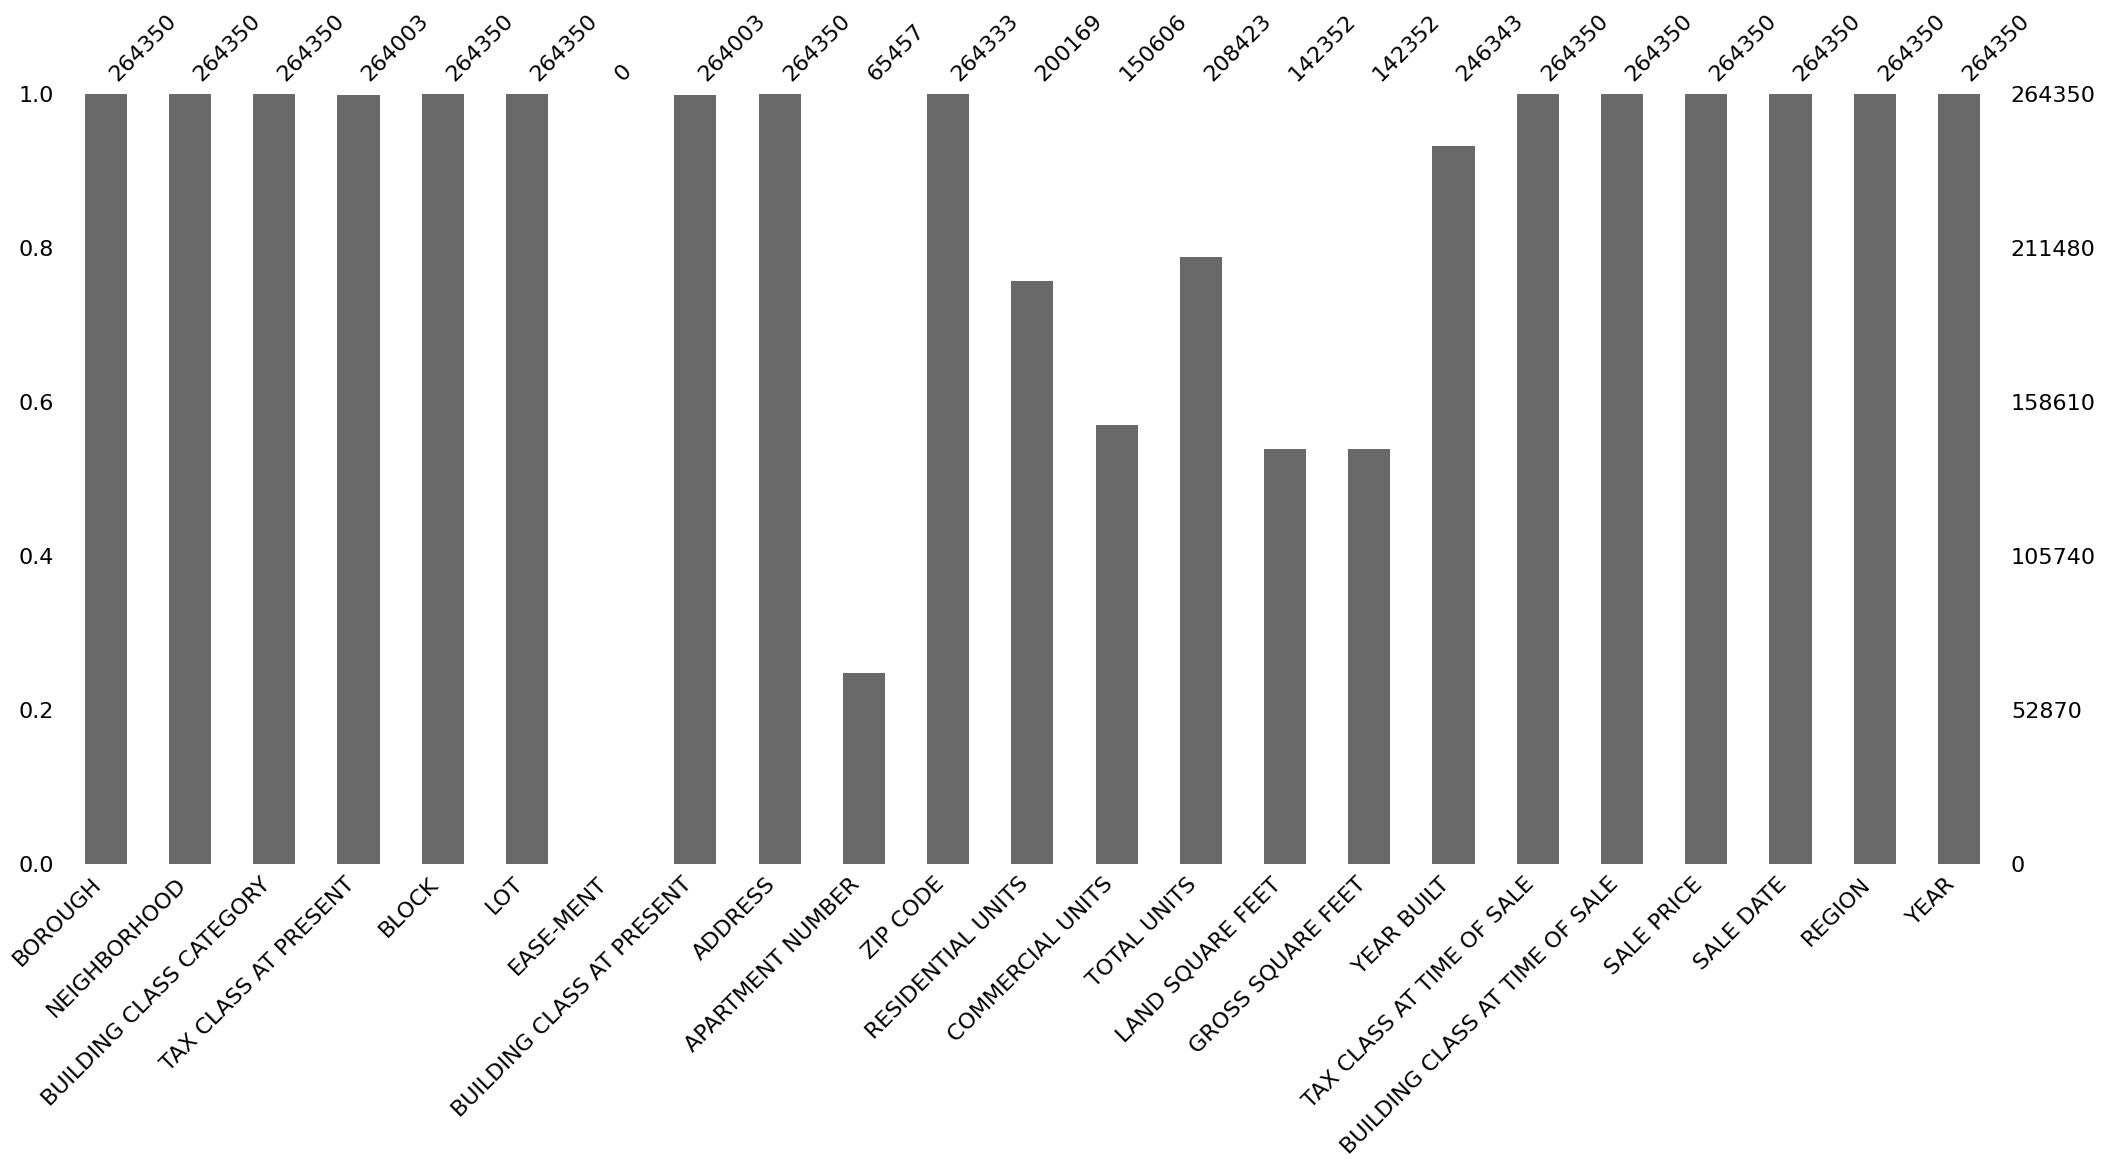

In [28]:
msno.bar(df)

<Axes: >

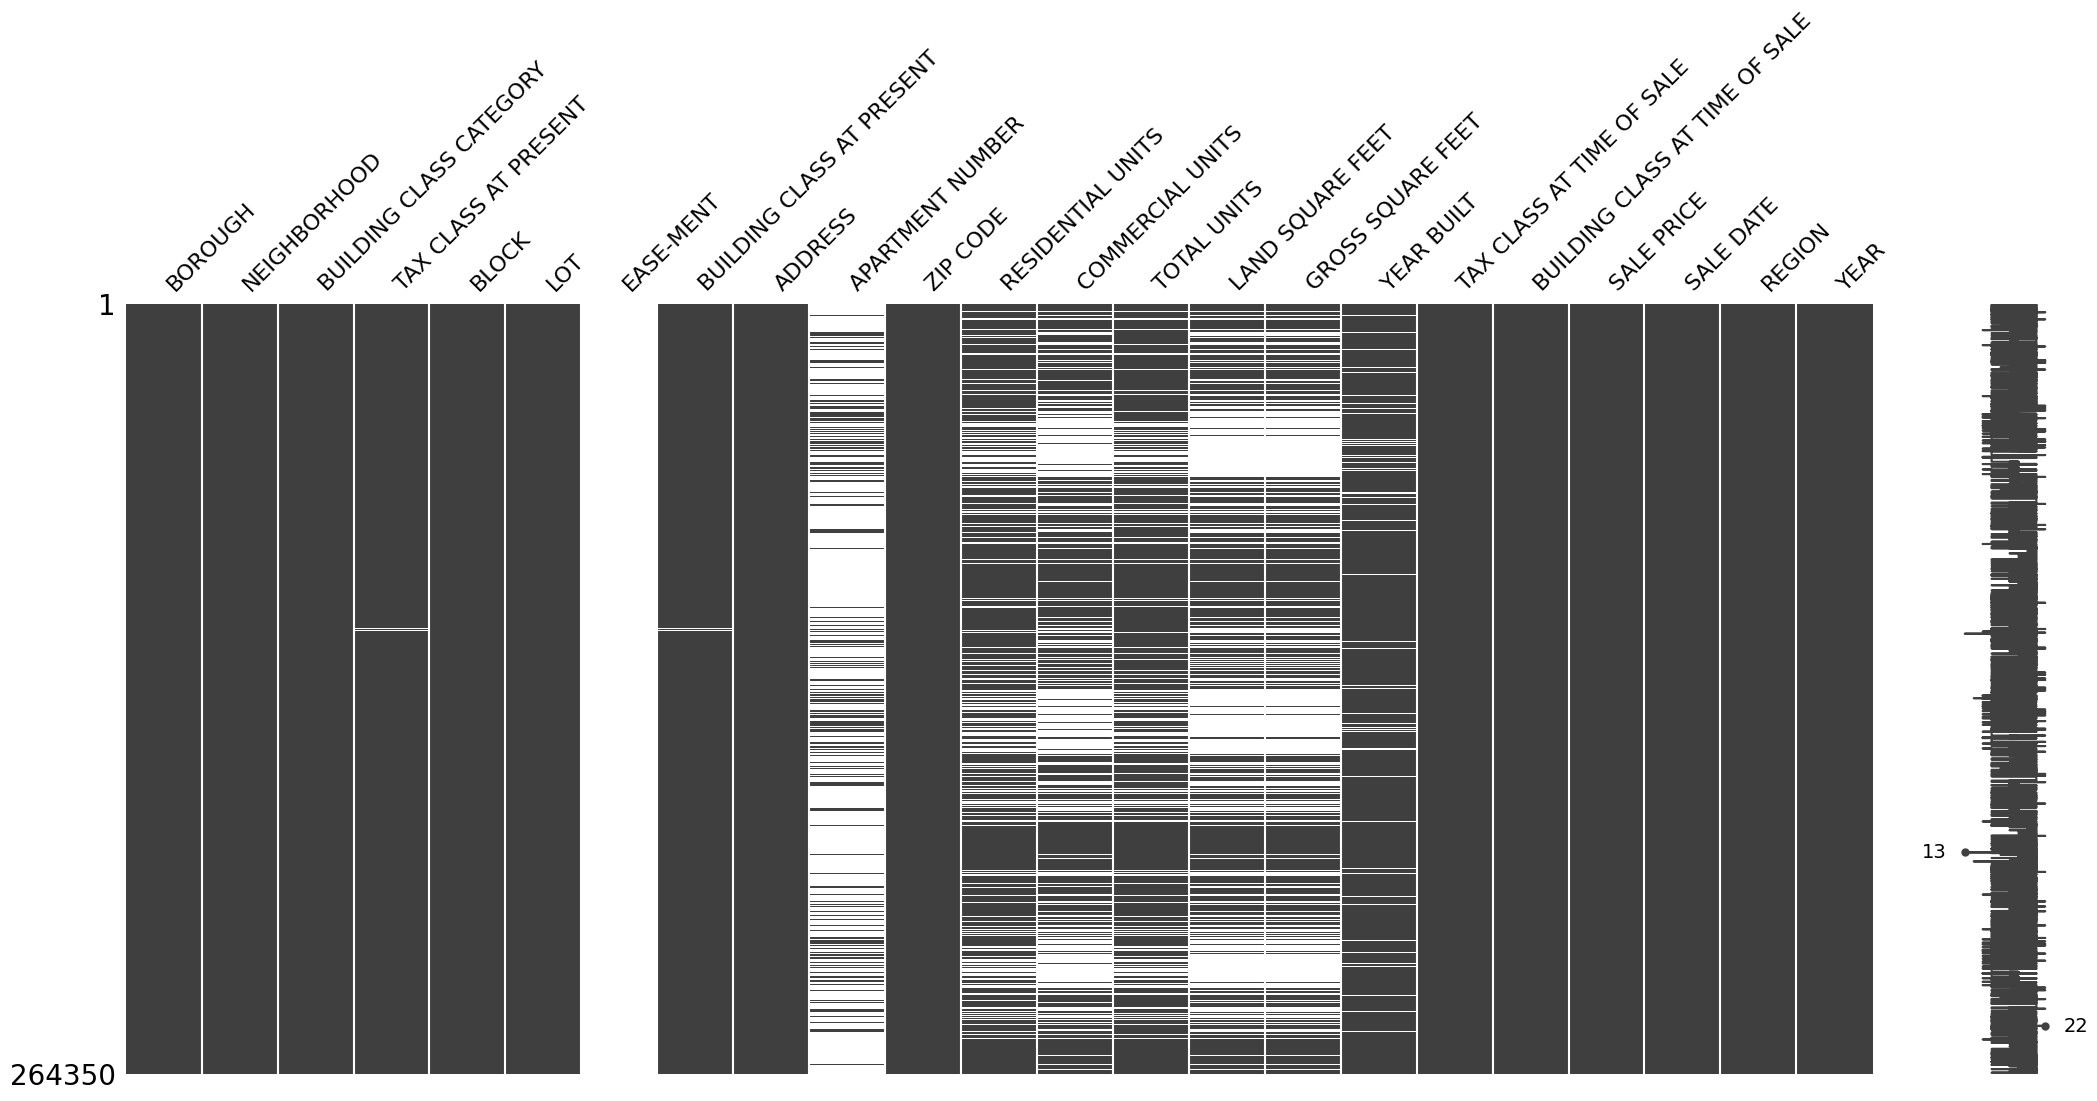

In [29]:
#create matrix to show missing values
msno.matrix(df)

In [30]:
#print the unique values in EASE-MENT column
print('\nUnique values in EASE-MENT column')
print(df['EASE-MENT'].unique())


Unique values in EASE-MENT column
[nan]


In [31]:
#drop EASE-MENT column from df
df.drop('EASE-MENT', axis=1, inplace=True)

In [32]:
#check that missing rows in TAX CLASS AT PRESENT column are also missing in Building Class At Present column
print('\nCheck missing rows in Building Class At Present column')
print(df[df['BUILDING CLASS AT PRESENT'].isnull()].head())
print('\nCheck missing rows in TAX CLASS AT PRESENT column')
print(df[df['TAX CLASS AT PRESENT'].isnull()].head())
#drop rows with missing values in TAX CLASS AT PRESENT column
df.dropna(subset=['TAX CLASS AT PRESENT'], inplace=True)


Check missing rows in Building Class At Present column
       BOROUGH            NEIGHBORHOOD            BUILDING CLASS CATEGORY  \
3653         2  MOTT HAVEN/PORT MORRIS               28 COMMERCIAL CONDOS   
3654         2  MOTT HAVEN/PORT MORRIS               28 COMMERCIAL CONDOS   
10712        3      BEDFORD STUYVESANT               28 COMMERCIAL CONDOS   
13574        3            BOROUGH PARK  15 CONDOS - 2-10 UNIT RESIDENTIAL   
13575        3            BOROUGH PARK  15 CONDOS - 2-10 UNIT RESIDENTIAL   

      TAX CLASS AT PRESENT  BLOCK   LOT BUILDING CLASS AT PRESENT  \
3653                   NaN   2308  1001                       NaN   
3654                   NaN   2308  1002                       NaN   
10712                  NaN   1886  1801                       NaN   
13574                  NaN   5586  1202                       NaN   
13575                  NaN   5586  1204                       NaN   

                       ADDRESS APARTMENT NUMBER  ZIP CODE  ...  TO

In [33]:
#find the average year built for each neighborhood
print('\nAverage year built for each neighborhood')
print(df.groupby('NEIGHBORHOOD')['YEAR BUILT'].mean())


Average year built for each neighborhood
NEIGHBORHOOD
AIRPORT JFK           2023.000000
AIRPORT LA GUARDIA    1947.142857
ALPHABET CITY         1937.442396
ANNADALE              1980.098765
ARDEN HEIGHTS         1988.156560
                         ...     
WOODHAVEN             1921.913470
WOODLAWN              1940.343234
WOODROW               1993.464444
WOODSIDE              1949.567663
WYCKOFF HEIGHTS       1941.016173
Name: YEAR BUILT, Length: 255, dtype: float64


In [34]:
#print the average amount of records in all neighborhoods
print('\nAverage amount of records in all neighborhoods')
print(df['NEIGHBORHOOD'].value_counts().mean())


Average amount of records in all neighborhoods
1035.3058823529411


In [35]:
#Chat GPT aided in with this code
#print the oldest and newest nieghborhoods by average year built with the year shown with atleast 100 records
print('\nOldest and newest nieghborhoods by average year built with the year shown with atleast 100 records')
print(df.groupby('NEIGHBORHOOD').filter(lambda x: len(x) >= 100).groupby('NEIGHBORHOOD')['YEAR BUILT'].mean().sort_values(ascending=True).head(1))
print(df.groupby('NEIGHBORHOOD').filter(lambda x: len(x) >= 100).groupby('NEIGHBORHOOD')['YEAR BUILT'].mean().sort_values(ascending=True).tail(1))


Oldest and newest nieghborhoods by average year built with the year shown with atleast 100 records
NEIGHBORHOOD
CYPRESS HILLS    1917.487432
Name: YEAR BUILT, dtype: float64
NEIGHBORHOOD
SPRING CREEK    2011.357143
Name: YEAR BUILT, dtype: float64


In [36]:
#print house types in Cypress Hills and Spring Creek with counts
print('\nHouse types in Cypress Hills and Spring Creek with counts')
print(df[df['NEIGHBORHOOD'] == 'CYPRESS HILLS']['BUILDING CLASS CATEGORY'].value_counts().head())
print(df[df['NEIGHBORHOOD'] == 'SPRING CREEK']['BUILDING CLASS CATEGORY'].value_counts().head())


House types in Cypress Hills and Spring Creek with counts
BUILDING CLASS CATEGORY
02 TWO FAMILY DWELLINGS           492
01 ONE FAMILY DWELLINGS           181
03 THREE FAMILY DWELLINGS         116
07 RENTALS - WALKUP APARTMENTS     26
14 RENTALS - 4-10 UNIT             25
Name: count, dtype: int64
BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS               41
36 OUTDOOR RECREATIONAL FACILITIES    19
05 TAX CLASS 1 VACANT LAND            17
02 TWO FAMILY DWELLINGS               11
22 STORE BUILDINGS                    10
Name: count, dtype: int64


In [37]:
#Chat GPT aided in with this code
#fill missing values in YEAR BUILT column with average year built for each neighborhood
df['YEAR BUILT'] = df.groupby('NEIGHBORHOOD')['YEAR BUILT'].transform(lambda x: x.fillna(x.mean()))

In [38]:
#print count of records with missing residential units
print('\nCount of records with missing residential units')
print(df['RESIDENTIAL UNITS'].isnull().sum())
print('\nCount of records with missing commercial units')
print(df['COMMERCIAL UNITS'].isnull().sum())
print('\nCount of records with missing total units')
print(df['TOTAL UNITS'].isnull().sum())


Count of records with missing residential units
64105

Count of records with missing commercial units
113450

Count of records with missing total units
55904


In [39]:
#Chat GPT aided in with this code
# Fill in missing 'RESIDENTIAL UNITS' values
df['RESIDENTIAL UNITS'] = np.where(
    df['RESIDENTIAL UNITS'].isnull() & df['COMMERCIAL UNITS'].notnull() & df['TOTAL UNITS'].notnull(),
    df['TOTAL UNITS'] - df['COMMERCIAL UNITS'],
    df['RESIDENTIAL UNITS']
)

# Fill in missing 'COMMERCIAL UNITS' values
df['COMMERCIAL UNITS'] = np.where(
    df['COMMERCIAL UNITS'].isnull() & df['RESIDENTIAL UNITS'].notnull() & df['TOTAL UNITS'].notnull(),
    df['TOTAL UNITS'] - df['RESIDENTIAL UNITS'],
    df['COMMERCIAL UNITS']
)

# Fill in missing 'TOTAL UNITS' values
df['TOTAL UNITS'] = np.where(
    df['TOTAL UNITS'].isnull() & df['RESIDENTIAL UNITS'].notnull() & df['COMMERCIAL UNITS'].notnull(),
    df['RESIDENTIAL UNITS'] + df['COMMERCIAL UNITS'],
    df['TOTAL UNITS']
)

In [40]:
#print count of records with missing residential units
print('\nCount of records with missing residential units')
print(df['RESIDENTIAL UNITS'].isnull().sum())
print('\nCount of records with missing commercial units')
print(df['COMMERCIAL UNITS'].isnull().sum())
print('\nCount of records with missing total units')
print(df['TOTAL UNITS'].isnull().sum())


Count of records with missing residential units
55904

Count of records with missing commercial units
55904

Count of records with missing total units
55904


In [41]:
#print the types of houses that are missing total units and the counts
print('\nTypes of houses that are missing total units and the counts')
print(df[df['TOTAL UNITS'].isnull()]['BUILDING CLASS CATEGORY'].value_counts())


Types of houses that are missing total units and the counts
BUILDING CLASS CATEGORY
10 COOPS - ELEVATOR APARTMENTS    42903
09 COOPS - WALKUP APARTMENTS       8630
17 CONDO COOPS                     3943
01 ONE FAMILY DWELLINGS             428
Name: count, dtype: int64


In [42]:
#print a house that is of type one family dwelling and is not missing total units
print('\nA house that is of type one family dwelling and is not missing total units')
print(df[(df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS') & (df['TOTAL UNITS'].notnull())].head())


A house that is of type one family dwelling and is not missing total units
   BOROUGH NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3028   
1        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3028   
2        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3039   
3        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3045   
4        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3046   

   LOT BUILDING CLASS AT PRESENT                ADDRESS APARTMENT NUMBER  \
0   23                        A1  408 EAST 179TH STREET              NaN   
1   24                        A1  410 EAST 179TH STREET              NaN   
2   63                        A1  469 EAST 185TH STREET              NaN   
3   12                        A1   2052 BATHGATE AVENUE              NaN   
4   39                        A1   2075 BATHGATE AVENUE        

In [43]:
#fill in all one family dwelling houses with 1 for total units, 1 for residential units and 0 for commercial units if missing
df.loc[(df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS') & df['TOTAL UNITS'].isnull(), 'TOTAL UNITS'] = 1
df.loc[(df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS') & df['RESIDENTIAL UNITS'].isnull(), 'RESIDENTIAL UNITS'] = 1
df.loc[(df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS') & df['COMMERCIAL UNITS'].isnull(), 'COMMERCIAL UNITS'] = 0

In [44]:
#fill all records with a commercial unit value of non 0 as the same for total units and set 0 for the residential units
df.loc[df['COMMERCIAL UNITS'].notnull(), 'RESIDENTIAL UNITS'] = 0
df.loc[df['COMMERCIAL UNITS'].notnull(), 'TOTAL UNITS'] = df['COMMERCIAL UNITS']

In [45]:
#fill all records with a residential unit value of non 0 as the same for total units and set 0 for the commercial units
df.loc[df['RESIDENTIAL UNITS'].notnull(), 'COMMERCIAL UNITS'] = 0
df.loc[df['RESIDENTIAL UNITS'].notnull(), 'TOTAL UNITS'] = df['RESIDENTIAL UNITS']

In [46]:
#print the types of houses that are missing total units and the counts
print('\nTypes of houses that are missing total units and the counts')
print(df[df['TOTAL UNITS'].isnull()]['BUILDING CLASS CATEGORY'].value_counts())


Types of houses that are missing total units and the counts
BUILDING CLASS CATEGORY
10 COOPS - ELEVATOR APARTMENTS    42903
09 COOPS - WALKUP APARTMENTS       8630
17 CONDO COOPS                     3943
Name: count, dtype: int64


In [47]:
print('\nCount of records with missing residential units')
print(df['RESIDENTIAL UNITS'].isnull().sum())
print('\nCount of records with missing commercial units')
print(df['COMMERCIAL UNITS'].isnull().sum())
print('\nCount of records with missing total units')
print(df['TOTAL UNITS'].isnull().sum())


Count of records with missing residential units
55476

Count of records with missing commercial units
55476

Count of records with missing total units
55476


In [48]:
#print all records with missing zip codes
print('\nAll records with missing zip codes')
print(df[df['ZIP CODE'].isnull()])


All records with missing zip codes
        BOROUGH   NEIGHBORHOOD     BUILDING CLASS CATEGORY  \
95524         5  OAKWOOD-BEACH  05 TAX CLASS 1 VACANT LAND   
130576        3   SPRING CREEK  05 TAX CLASS 1 VACANT LAND   
130577        3   SPRING CREEK  05 TAX CLASS 1 VACANT LAND   
130578        3   SPRING CREEK  05 TAX CLASS 1 VACANT LAND   
130579        3   SPRING CREEK  05 TAX CLASS 1 VACANT LAND   
155256        4        ARVERNE       29 COMMERCIAL GARAGES   
184463        5     BLOOMFIELD   31 COMMERCIAL VACANT LAND   
189351        5  OAKWOOD-BEACH  05 TAX CLASS 1 VACANT LAND   
208097        3  EAST NEW YORK       29 COMMERCIAL GARAGES   
234870        4        ARVERNE       29 COMMERCIAL GARAGES   
258018        5  ARDEN HEIGHTS   31 COMMERCIAL VACANT LAND   
260805        5  MIDLAND BEACH  05 TAX CLASS 1 VACANT LAND   
261894        5  OAKWOOD-BEACH  05 TAX CLASS 1 VACANT LAND   
261895        5  OAKWOOD-BEACH  05 TAX CLASS 1 VACANT LAND   
261896        5  OAKWOOD-BEACH  05

In [49]:
#replace all missing zip codes with the zip codes found manually on google maps
df.loc[(df['ADDRESS'] == 'N/A PROMENADE AVENUE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 10306
df.loc[(df['ADDRESS'] == 'N/A VANDALIA AVENUE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 11207
df.loc[(df['ADDRESS'] == 'N/A DREW STREET') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 11208
df.loc[(df['ADDRESS'] == 'N/A BEACH CHANNEL DRIVE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 11693
df.loc[(df['ADDRESS'] == 'N/A GREAT KILLS LANE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 10308
df.loc[(df['ADDRESS'] == 'N/A GULF AVENUE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 10314
df.loc[(df['ADDRESS'] == 'N/A DONGAN HILLS AVENUE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 10305
df.loc[(df['ADDRESS'] == 'N/A LINDNER AVENUE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 10312
df.loc[(df['ADDRESS'] == 'N/A LINDEN BOULEVARD') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 11207

In [50]:
#print amount of records with 0 as as their sale price value
print('\nAmount of records with 0 as sale price')
print(len(df[df['SALE PRICE'] == 0]))


Amount of records with 0 as sale price
75549


<Axes: >

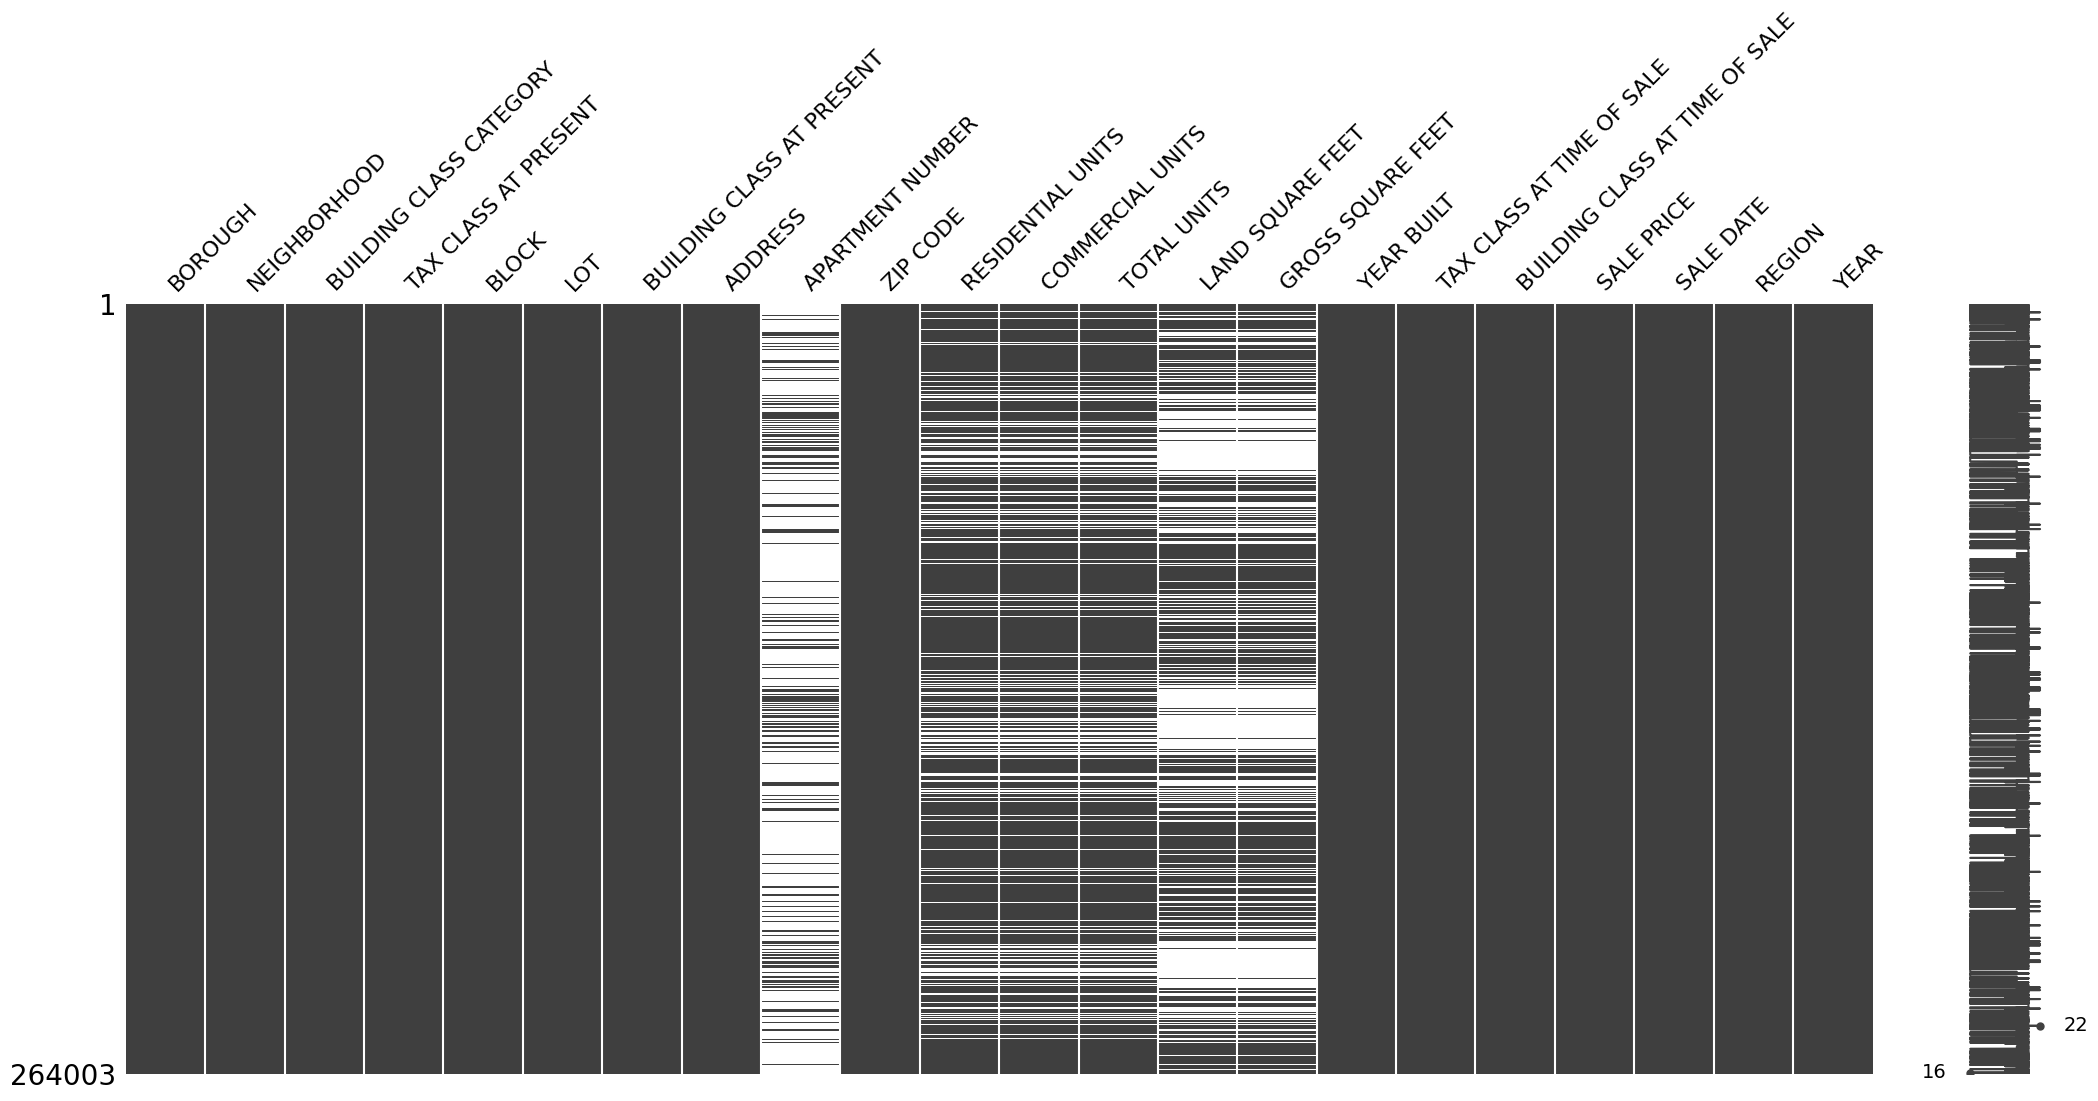

In [51]:
msno.matrix(df)

In [52]:
#missing values in the provided dataset.
print('Missing values in the given dataset')
print(df.isnull().sum())

Missing values in the given dataset
BOROUGH                                0
NEIGHBORHOOD                           0
BUILDING CLASS CATEGORY                0
TAX CLASS AT PRESENT                   0
BLOCK                                  0
LOT                                    0
BUILDING CLASS AT PRESENT              0
ADDRESS                                0
APARTMENT NUMBER                  198546
ZIP CODE                               0
RESIDENTIAL UNITS                  55476
COMMERCIAL UNITS                   55476
TOTAL UNITS                        55476
LAND SQUARE FEET                  121651
GROSS SQUARE FEET                 121651
YEAR BUILT                             0
TAX CLASS AT TIME OF SALE              0
BUILDING CLASS AT TIME OF SALE         0
SALE PRICE                             0
SALE DATE                              0
REGION                                 0
YEAR                                   0
dtype: int64


<p>In this section the missing values were analyzed, visualized and mostly handled. The missing values were identified to be in 12 attributes in the dataset. It was identified that the Ease-ment attribute was entirely missing so it was subsequently dropped from the dataset. Visualizations were then created to see any trends in the missing values for the other attributes. It was identified that a small number of records (approx 340) had missing values in the TAX CLASS AT PRESENT attribute and those same records were also missing in the BUILDING CLASS AT PRESENT attribute these records were subsequently dropped from the dataset. The YEAR-BUILT attribute had approximately 18000 missing records (~6.7% of the dataset) and was filled using the average of year built in each neighborhood. It was also identified that of the neighborhoods with atleast 100 records Cypress Hill had the oldest average year built value at 1927, and Spring Creek had the youngest at 2011.</p>
<p>The RESIDENTIAL UNITS, COMMERCIAL UNITS and TOTAL UNITS were then identified as having a relationship between them. Being calculated by this formula:
<br><br>RESIDENTIAL UNITS + COMMERCIAL UNITS = TOTAL UNITS<br><br>
This was used to fill in any missing cells that contained atleast two other variables, ie. if a record was missing total units but had the amount of residential and commercial then their sum was calculated and the total units was added into that cell. Furthermore, it was identified that 4 house types were still missing units: '10 COOPS - ELEVATOR APARTMENTS', '09 COOPS - WALKUP APARTMENTS', '17 CONDO COOPS' and '01 ONE FAMILY DWELLINGS'. The '01 ONE FAMILY DWELLINGS' was then identified as always having 1 residential unit 0 commercial units and 1 total unit so all missing records of this class were filled in. Other records containing solely commercial units and solely residential units were also filled in. Another trend that was identified is that all house types containing 'COOPS' in their title had missing units.</p>
<p>Finally, there were 17 records with missing Zip Code values. The attribute was manually filled in by looking up the address on google maps.</p>
<p>It was also identified that 75549 records contained 0 for their SALE PRICE value.</p>

<hr>

<h1>Q2</h1>

<p><b>Question #1</b>: Post Covid-19, is there a relationship between the size of a house and its sale price in Borough 1?</p>
<p><b>Motivation</b>: The result of this analysis will help determine if the characteristic of house size is a large factor in the sale of a house. This will help stakeholders such as real estate agents, property owners and property buyers help determine the valuation of a property.</p>
<p><b>Null Hypothesis (h0)</b>: There is no relationship between the size of a house and its sale price in Borough 1</p>
<p><b>Alternative Hypothesis (h1)</b>: There is a relationship between the size of a house and its sale price in Borough 1</p>
<p><b>Test Performed</b>: Since we are examininig the relationship between two numeric attributes, the gross square feet and sale price, a correlation test will be performed. The probability distributions were identified for the Gross Square Feet and Sale Price attributes and since they were both determined to not be Normally distributed a Spearman's Rank Correlation Test was performed.</p>
<br>
<p><b>Answer</b>: After performing the Spearman's Rank Correlation test on the data we can see that the resulting Correlation Coefficient was ~0.079 and the p-value was ~ 2.72e-6. These values can be interpreted in order to answer our initial Hypothesis Question. In the end we will be taking the Alternative Hypothesis saying that there is a relationship between the size of a house and its sale price in Borough 1. Since the Correlation Coefficient is positive it demonstrates that there is a positive correlation between the size of the house and its resulting sale price (as size increases the house price also increases). However, since the value of Correlation Coefficient is very small (close to 0) we determine that the positive correlation is not very strong meaning that as the size increases the sale price slowly increases. Moreover, the p-value was significantly less then our alpha of 0.05 meaning we can reject our null hypothesis and conclude that there is a statistically significant relationship between the size of a house and its sale price in Borough 1.</p>


In [53]:
#filter df for borough 1 data
df_filtered = df[(df['BOROUGH'] == 1)]
df_filtered = df_filtered[(df_filtered['SALE PRICE'] != 0) & (df_filtered['GROSS SQUARE FEET'] !=0)]
df_filtered = df_filtered.dropna(subset=['GROSS SQUARE FEET', 'SALE PRICE'])

In [54]:
#chat gpt aided with this code
stat_size, p_size = shapiro(df_filtered['GROSS SQUARE FEET'])
print('GROSS SQUARE FEET -> stat=%.3f, p=%.3f' % (stat_size, p_size))
if p_size > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

# Perform Shapiro-Wilk test on 'SALE PRICE'
stat_price, p_price = shapiro(df_filtered['SALE PRICE'])
print('SALE PRICE -> stat=%.3f, p=%.3f' % (stat_price, p_price))
if p_price > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

GROSS SQUARE FEET -> stat=0.391, p=0.000
Probably not Gaussian
SALE PRICE -> stat=0.224, p=0.000
Probably not Gaussian


In [55]:
# Perform Spearman's rank correlation test
correlation, p_value = stats.spearmanr(df_filtered['GROSS SQUARE FEET'], df_filtered['SALE PRICE'])
print(f'Correlation: {correlation}, P-value: {p_value}')

Correlation: 0.07954278080450095, P-value: 2.72307847132431e-06


<p><b>Question #2</b>: Is there a sale price difference between neighborhoods in Borough 2?</p>
<p><b>Motivation</b>: The result of this analysis will help determine if there is a change in sale price value between the different neighborhoods in Borough 2. This will help stakeholders such as real estate agents, property owners and property buyers help determine the valuation of a property.</p>
<p><b>Null Hypothesis (h0)</b>: There is no difference in sale price between neighborhoods in Borough 2</p>
<p><b>Alternative Hypothesis (h1)</b>: There is a difference in sale price between neighborhoods in Borough 2</p>
<p><b>Test Performed</b>: Since we are examininig the relationship between one numeric attribute and more then one categorical attribute, the sale price and neighborhoods in borough 2, an ANOVA test will be performed.</p>
<br>
<p><b>Answer</b>: After performing the ANOVA test on the data we can see that the resulting F-statistic was ~26.89 and the p-value was ~ 1.21e-173. These values can be interpreted in order to answer our initial Hypothesis Question. In the end we will be taking the Alternative Hypothesis saying that there is a difference in sale price between neighborhoods in Borough 2. The F-statistic demonstrates this because it's value of 26.89 is relatively high meaning that there was significant variance from the mean by each category (each neighborhood). Moreover, the p-value was significantly less then our alpha of 0.05 meaning we can reject our null hypothesis and conclude that there is a statistically significant difference in the sale prices in each neighborhood in Borough 2.</p>

In [56]:
# Filter the data for Borough 2
df_borough2 = df[df['BOROUGH'] == 2]

In [57]:
#remove all records with SALE PRICE as 0
df_borough2 = df_borough2[df_borough2['SALE PRICE'] != 0]

In [58]:
# Group the data by neighborhood and extract the 'SALE PRICE' column
groups = df_borough2.groupby('NEIGHBORHOOD')['SALE PRICE'].apply(list)

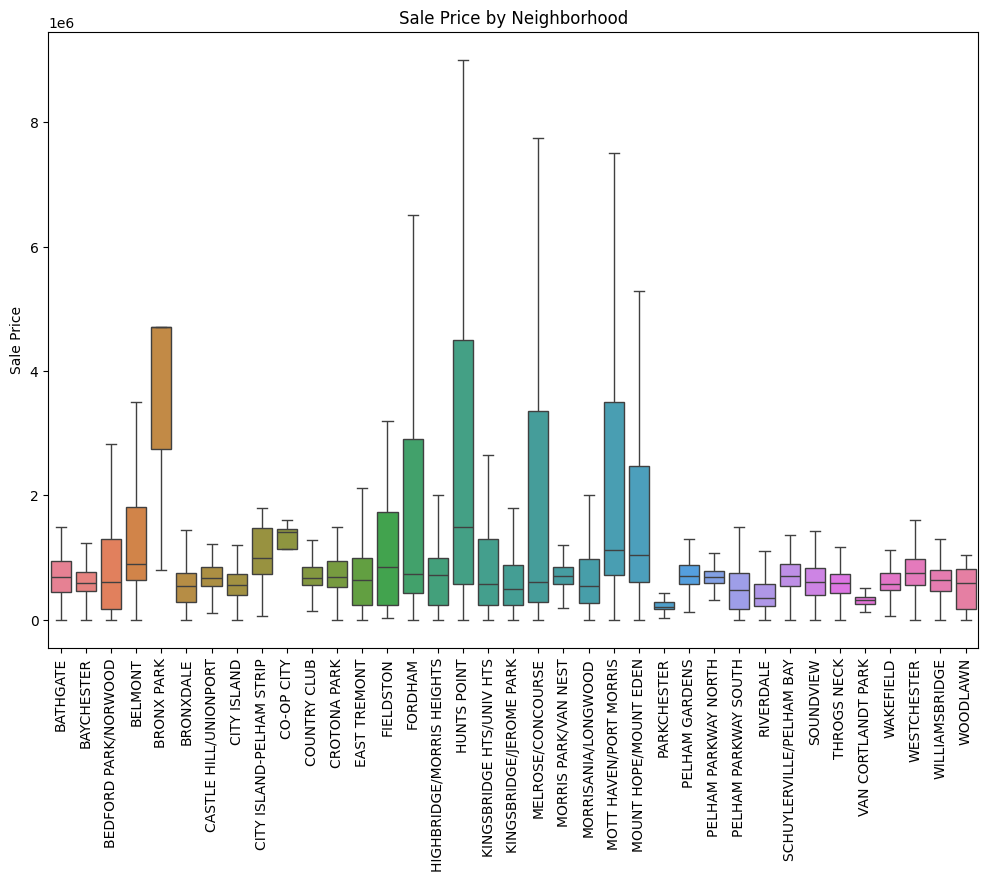

In [59]:
#chatgpot aided with this code
# Convert groups to a DataFrame for easier plotting
df_groups = pd.DataFrame({col:vals['SALE PRICE'] for col,vals in df_borough2.groupby('NEIGHBORHOOD')})

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_groups, showfliers=False)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Sale Price by Neighborhood')
plt.ylabel('Sale Price')
plt.show()

In [60]:
# Perform the ANOVA test
F, p = stats.f_oneway(*groups)

print(f'F-statistic: {F}, P-value: {p}')

F-statistic: 26.893364568834198, P-value: 1.6056719843259595e-173


<hr>

<h1>Q3</h1>

<p>We are now going to analyze the house prices and house sales for these 3 types of houses: 
    <ol>
    <li>'01 ONE FAMILY DWELLINGS'
    <li>'02 TWO FAMILY DWELLINGS'
    <li>'03 THREE FAMILY DWELLINGS'
    </ol>
</p>

In [61]:
#print the counts for '01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS' and '03 THREE FAMILY DWELLINGS'
print('\nCounts for 3 house types')
print(df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']['SALE PRICE'].count())
print(df[df['BUILDING CLASS CATEGORY'] == '02 TWO FAMILY DWELLINGS']['SALE PRICE'].count())
print(df[df['BUILDING CLASS CATEGORY'] == '03 THREE FAMILY DWELLINGS']['SALE PRICE'].count())


Counts for 3 house types
56613
47577
13450


In [62]:
def house_price_boxplots(df):
    # Create boxplots for house prices
    plt.figure(figsize=(6, 12))
    sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=df)
    plt.title('House Prices for Different Building Classes')
    plt.xticks(rotation='vertical') 
    plt.show()

def house_price_boxplots_no_outliers(df):
    # Create boxplots for house prices
    plt.figure(figsize=(6, 12))
    sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=df, showfliers=False)
    plt.title('House Prices for Different Building Classes')
    plt.xticks(rotation='vertical') 
    plt.show()

def house_sales_bargraph(df):
    # Create bar plots for house sales
    house_sales = df['BUILDING CLASS CATEGORY'].value_counts()
    house_sales.plot(kind='bar', figsize=(10, 6))
    plt.title('House Sales for Different Building Classes')
    plt.xlabel('Building Class Category')
    plt.ylabel('Number of Sales')
    plt.show()

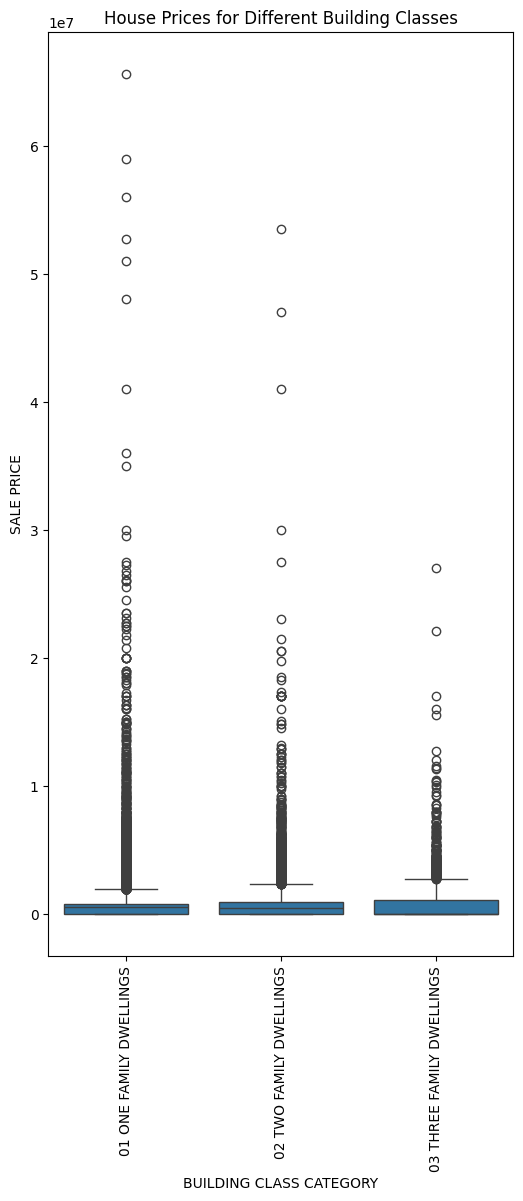

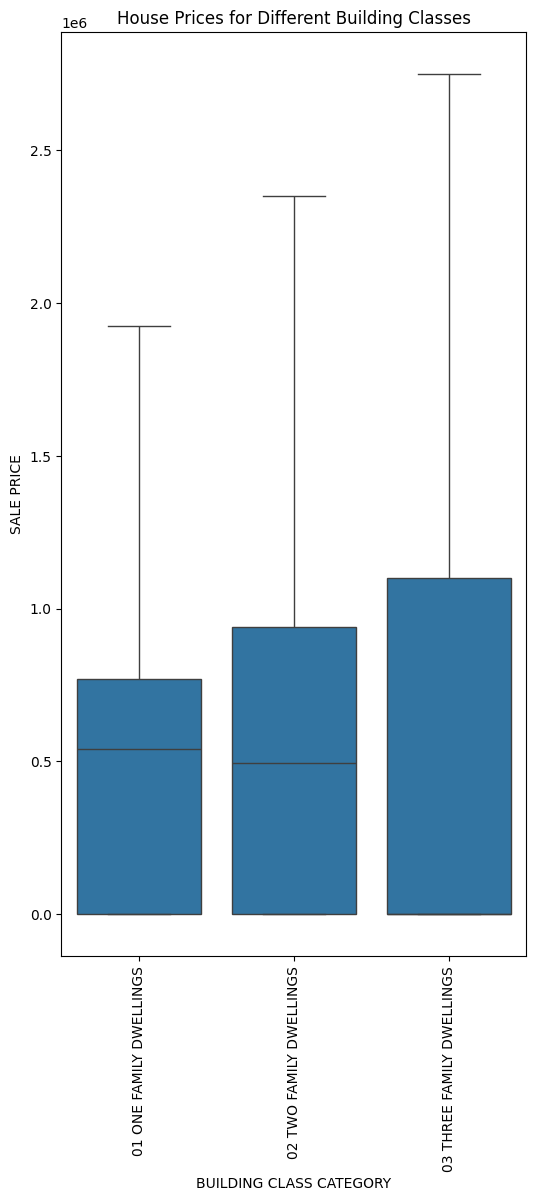

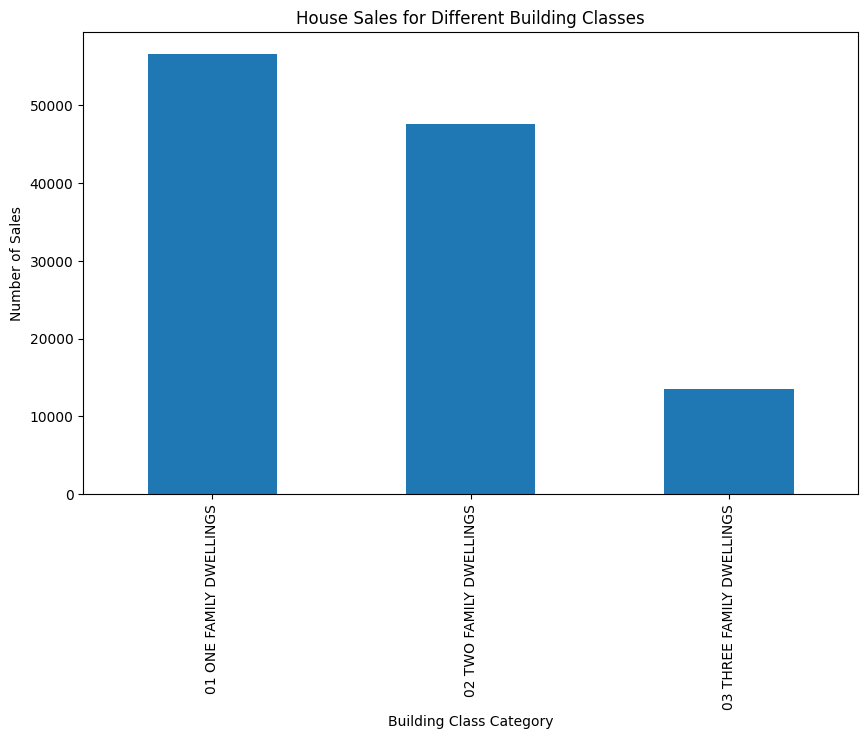

In [63]:
# Filter the DataFrame to include only the chosen house types and include zero sale prices
df_filtered = df[df['BUILDING CLASS CATEGORY'].isin(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS','03 THREE FAMILY DWELLINGS'])]
house_price_boxplots(df_filtered)
house_price_boxplots_no_outliers(df_filtered)
house_sales_bargraph(df_filtered)

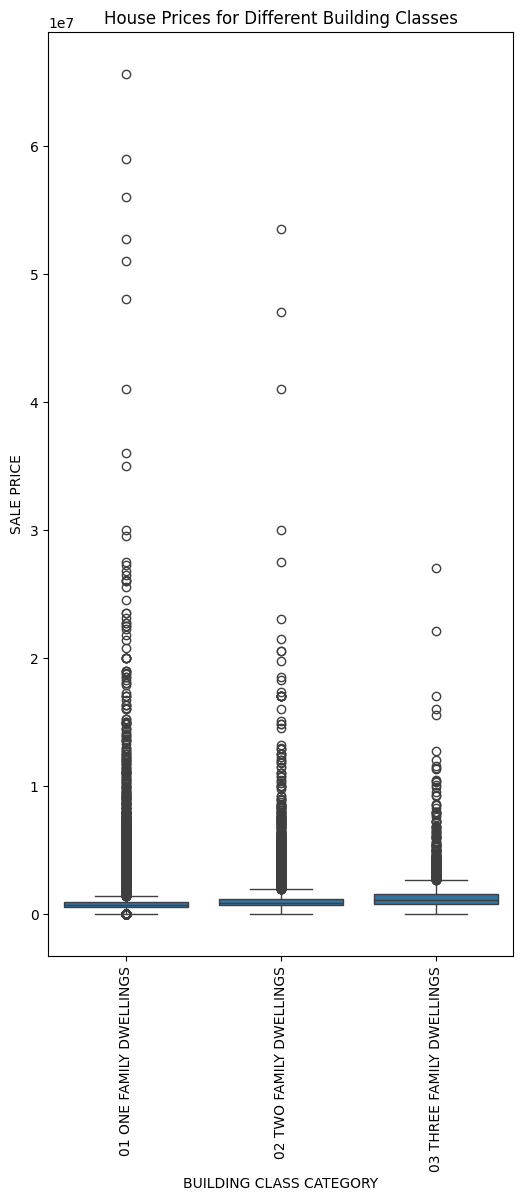

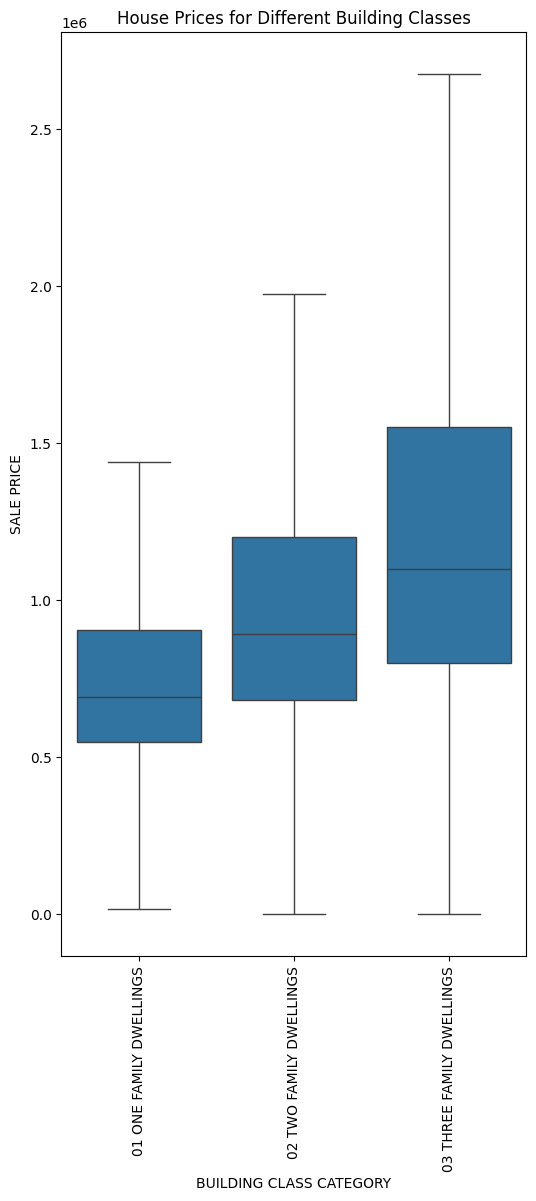

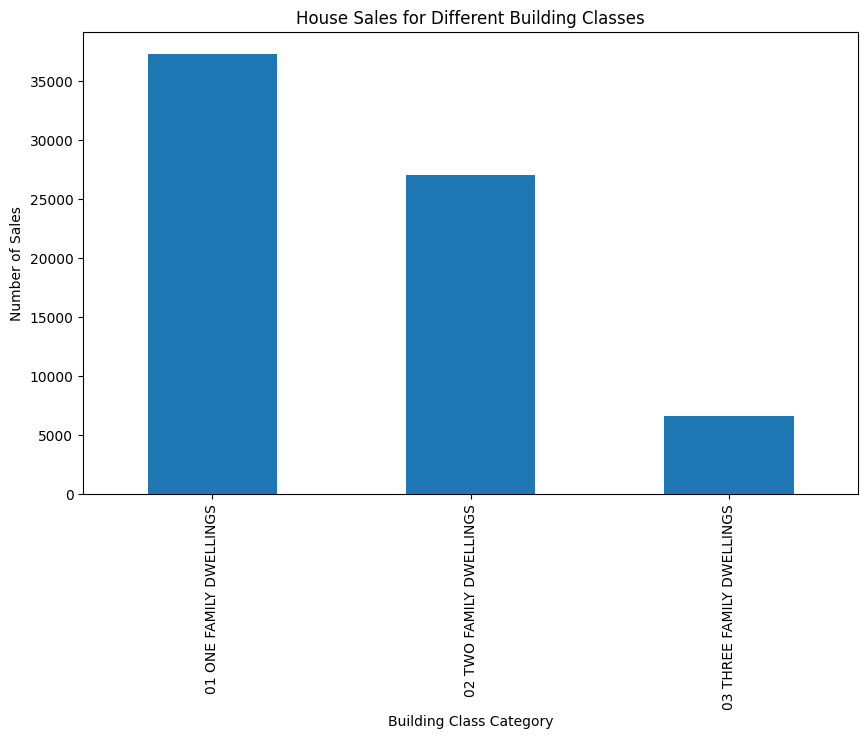

In [64]:
# Filter the DataFrame to include only the chosen house types and exclude zero sale prices
df_filtered = df[(df['BUILDING CLASS CATEGORY'].isin(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS','03 THREE FAMILY DWELLINGS'])) & (df['SALE PRICE'] != 0)]
house_price_boxplots(df_filtered)
house_price_boxplots_no_outliers(df_filtered)
house_sales_bargraph(df_filtered)

<p>In order to compare the house sales and house prices for '01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS' and '03 THREE FAMILY DWELLINGS' house types, boxplots and bar graphs were created. Boxplots were created to visualize the differences in median house prices and any resulting outliers, bar graphs were created to visualize the differences in amount of sales per house type. In addition to this, these graphs were created once on a subset of the dataset containing the records of sale prices that were equal to zero and another time on a subset excluding records of sale prices that were zero. This aided in demonstrating a clearer picture as well as show related trends.</p>
<p>In the first case (including zero values for sale prices), we can see the difference in median prices between the 3 house types and any outliers by looking at the boxplots. The first boxplot demonstrates the entire subset for each house type and we can see that the '01 ONE FAMILY DWELLINGS' has the largest outlier in its sale price. We can also see that the '03 THREE FAMILY DWELLINGS' has the smallest outlier in sale price. However, in the first box plot it is difficult to see the median value for each house type due to the congestion and scaling of the plot. Because of this a second box plot was created tha removed the outliers so the median values could be easily viewed. In this plot we can see that the '01 ONE FAMILY DWELLINGS' had the highest median value at just above 0.5x10^6. However, this representation is skewed due to the amount of missing sale price values in the three house types. We know that this is true because the median value for the '03 THREE FAMILY DWELLINGS' is 0 meaning that there is a significant amount of missing values in this house type. A better representation is made in the second case where we excluded all missing values in the sale price attribute. Finally a bar graph was made to see the count distribution for each house type and we can see that the '01 ONE FAMILY DWELLINGS' had the most amount of sales at around 55000 records and the '03 THREE FAMILY DWELLINGS' had by far the least amount of sales at around 15000 records.</p>
<p>In the second case (excluding zero values for sale prices), we can see a better representation of the median prices through looking at the boxplots created. In this case we can see that the trend in outliers stays consistent with the first case as the '01 ONE FAMILY DWELLINGS' has the largest outlier in sale price and the '03 THREE FAMILY DWELLINGS' has the lowest. However, in median value we can see that the opposite scenario occurs then in the first case. In this case the '03 THREE FAMILY DWELLINGS' has the highest median value at just over 1x10^6 and the '01 ONE FAMILY DWELLINGS' has the lowest at 0.6x10^6. Finally, we can see that the count distribution of the 3 house types is consistent with the first case as the '01 ONE FAMILY DWELLINGS' has the highest count of the 3 and the '03 THREE FAMILY DWELLINGS' has by far the least.</p>
<hr>

<h1>Q4</h1>

<h4>The Regression modelling task that is going to be performed is Predicting the Sale Price of NYC houses Post Covid-19 using historical data. </h4>
<p>For this regression task there are several aspects of the dataset that must be processed and analyzed to increase the final model's performance on generalized records and attain the most accurate predictions. For this task we are going to be using our previous findings in order to select the attributes that are going to be used for our final prediction task. Based on our initial EDA findings it was determined that the 5 different Boroughs have different mean Sale Price values this could indicate that there are inherit features inside of this attribute which will help determine the Final Sale Price. Moreover, it was also determined that the different building types also have different median sale prices, this attribute will similarily be used as an attribute to determine final sale price. Through analyzing the missing values in the dataset the year built and land square feet will also be used as attributes for our regression task. In addition, the Residential and Commercial Units will also be used however, the total units will not be used as it is derived from the residential and commercial units. Finally through our Hypothesis testing it was determined that the Gross Square feet and Neighborhood attributes could be highly related to the final sale price and both will be used in our regression task.</p>

In [65]:
columns_to_keep = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'RESIDENTIAL UNITS', 
                   'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']
df_subset = df[columns_to_keep]

In [66]:
print(df_subset.head())

   BOROUGH NEIGHBORHOOD  BUILDING CLASS CATEGORY  RESIDENTIAL UNITS  \
0        2     BATHGATE  01 ONE FAMILY DWELLINGS                0.0   
1        2     BATHGATE  01 ONE FAMILY DWELLINGS                0.0   
2        2     BATHGATE  01 ONE FAMILY DWELLINGS                0.0   
3        2     BATHGATE  01 ONE FAMILY DWELLINGS                0.0   
4        2     BATHGATE  01 ONE FAMILY DWELLINGS                0.0   

   COMMERCIAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
0               0.0            1842.0             2048.0      1901.0   
1               0.0            1842.0             2048.0      1901.0   
2               0.0            1650.0             1296.0      1910.0   
3               0.0            2340.0             1516.0      1910.0   
4               0.0            1986.0             1344.0      1899.0   

   SALE PRICE  
0           0  
1      600000  
2      455000  
3      580000  
4           0  


<Axes: >

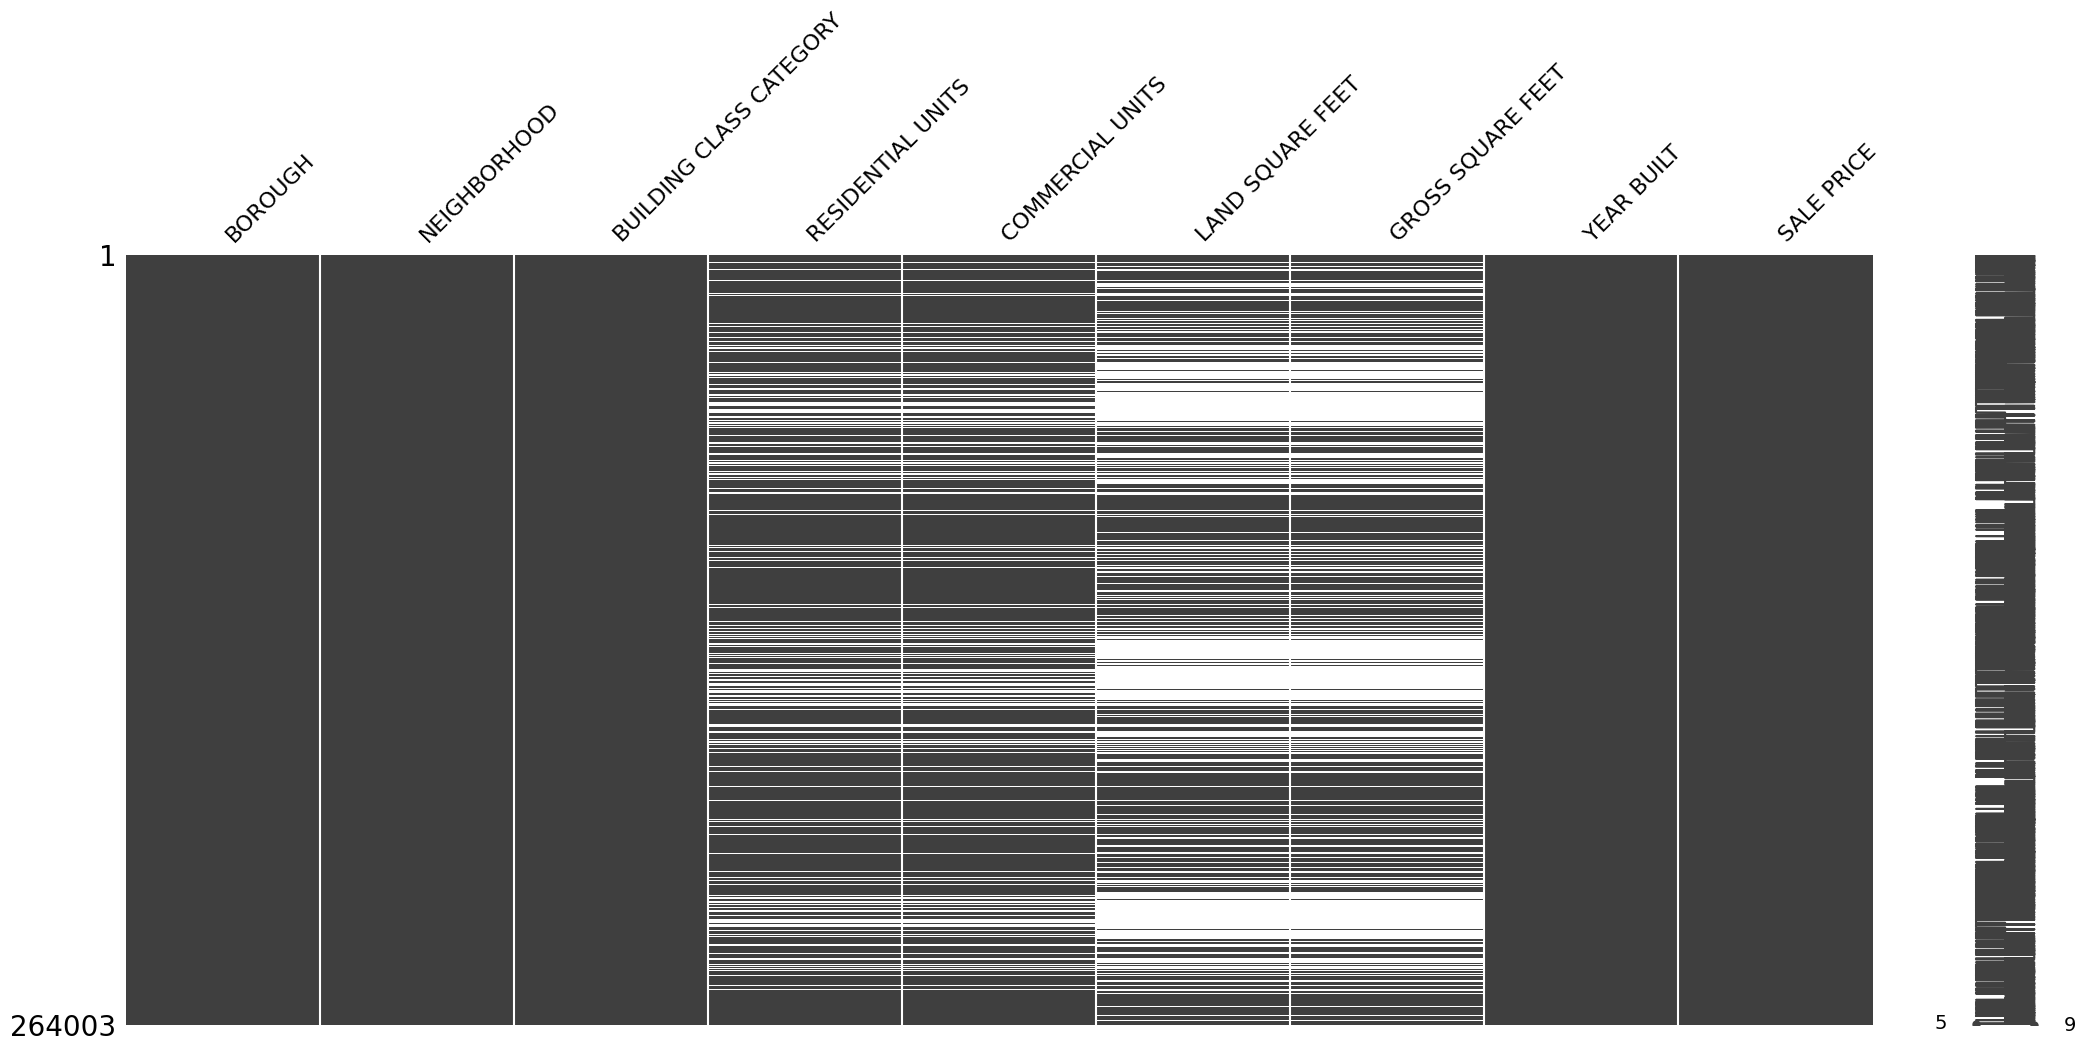

In [67]:
msno.matrix(df_subset)

In [68]:
#print the building types that have missing residential units
print(df_subset[df_subset['RESIDENTIAL UNITS'].isnull()]['BUILDING CLASS CATEGORY'].value_counts())

BUILDING CLASS CATEGORY
10 COOPS - ELEVATOR APARTMENTS    42903
09 COOPS - WALKUP APARTMENTS       8630
17 CONDO COOPS                     3943
Name: count, dtype: int64


In [69]:
#remove records where the building class categories are either '10 COOPS - ELEVATOR APARTMENTS', '09 COOPS - WALKUP APARTMENTS' or '17 CONDO COOPS'
categories_to_remove = ['10 COOPS - ELEVATOR APARTMENTS', '09 COOPS - WALKUP APARTMENTS', '17 CONDO COOPS']
df_subset = df_subset[~df_subset['BUILDING CLASS CATEGORY'].isin(categories_to_remove)]

In [70]:
#print the building types that have missing land square feet units
print(df_subset[df_subset['LAND SQUARE FEET'].isnull()]['BUILDING CLASS CATEGORY'].value_counts())

BUILDING CLASS CATEGORY
13 CONDOS - ELEVATOR APARTMENTS               43925
04 TAX CLASS 1 CONDOS                          5077
15 CONDOS - 2-10 UNIT RESIDENTIAL              4870
44 CONDO PARKING                               4495
12 CONDOS - WALKUP APARTMENTS                  3081
47 CONDO NON-BUSINESS STORAGE                  1359
43 CONDO OFFICE BUILDINGS                       919
46 CONDO STORE BUILDINGS                        493
01 ONE FAMILY DWELLINGS                         428
45 CONDO HOTELS                                 383
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT      340
28 COMMERCIAL CONDOS                            305
11 SPECIAL CONDO BILLING LOTS                   253
48 CONDO TERRACES/GARDENS/CABANAS               122
49 CONDO WAREHOUSES/FACTORY/INDUS                80
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC        45
Name: count, dtype: int64


In [71]:
#print the building types that have missing gross square feet units
print(df_subset[df_subset['GROSS SQUARE FEET'].isnull()]['BUILDING CLASS CATEGORY'].value_counts())

BUILDING CLASS CATEGORY
13 CONDOS - ELEVATOR APARTMENTS               43925
04 TAX CLASS 1 CONDOS                          5077
15 CONDOS - 2-10 UNIT RESIDENTIAL              4870
44 CONDO PARKING                               4495
12 CONDOS - WALKUP APARTMENTS                  3081
47 CONDO NON-BUSINESS STORAGE                  1359
43 CONDO OFFICE BUILDINGS                       919
46 CONDO STORE BUILDINGS                        493
01 ONE FAMILY DWELLINGS                         428
45 CONDO HOTELS                                 383
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT      340
28 COMMERCIAL CONDOS                            305
11 SPECIAL CONDO BILLING LOTS                   253
48 CONDO TERRACES/GARDENS/CABANAS               122
49 CONDO WAREHOUSES/FACTORY/INDUS                80
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC        45
Name: count, dtype: int64


<h1>Q5</h1>

<p>Final list of attributes for Q4 Regression Task: Borough, Neighborhood, Building Class Category, Residential Units, Commercial Units, Land Square Feet, Gross Square Feet, Year Built</p>